#### Maestría en Inteligencia de Negocios y Análisis de Datos
#### Tarea #3 - (Regresión con Ingeniería de Características)
#### Maycol Córdova 22007865



In [1]:
#Carga de librerias. 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importación Dataset
data = pd.read_csv('train.csv')
data.shape

(14447, 11)

In [3]:
data


,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,9744,-121.65,36.77,15,2191,358.0,1150,330,4.7969,227500.0,<1H OCEAN
1,13893,-116.27,34.13,37,452,109.0,184,59,3.7292,65800.0,INLAND
2,18277,-122.07,37.34,35,1172,184.0,512,175,7.3561,500001.0,<1H OCEAN
3,16176,-122.39,37.74,52,126,24.0,37,27,10.2264,225000.0,NEAR BAY
4,8843,-118.38,34.09,28,4001,1352.0,1799,1220,2.5784,272900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...,...
14442,557,-122.25,37.77,43,4329,1110.0,2086,1053,2.9750,243400.0,NEAR BAY
14443,16090,-122.48,37.71,43,3850,1018.0,1497,829,3.5296,400000.0,NEAR OCEAN
14444,9083,-118.17,34.69,12,4881,803.0,2188,724,4.1667,171900.0,INLAND
14445,13138,-121.44,38.47,5,5666,1178.0,3139,1131,3.3608,108900.0,INLAND


#### 1. Determine que columnas poseen faltantes (NA o Nulos), 

In [4]:
#Validación de columnas que tiene NAN o datos que necesitan ser tratados o eliminados. 
cols_con_na = [col for col in data.columns if (data[col].isnull().mean() > 0)]
cols_con_na

['total_bedrooms']

In [5]:
#Veidación de los tipos de datos que necesitan tratamiento o eliminación
data[cols_con_na].dtypes

total_bedrooms    float64
dtype: object

#### 2. Determine la proporción de faltantes para cada columna con faltantes, muestre una gráfica de barras.

In [6]:
#Verficacion de promedio de NAN que tiene cada columna, para poder tratar se toma base del 0.05
prop_nan_per_col = data[cols_con_na].isnull().mean()
prop_nan_per_col

total_bedrooms    0.009483
dtype: float64

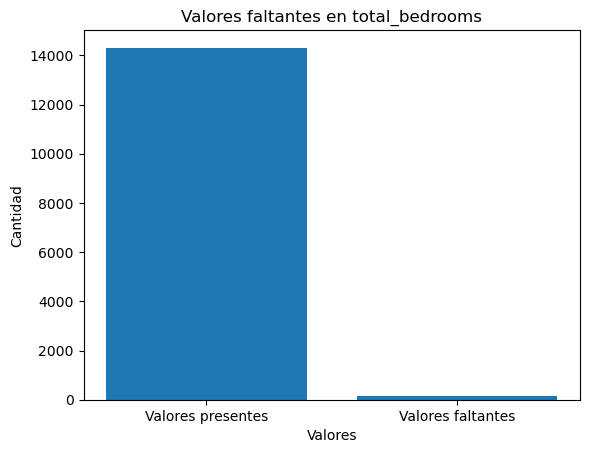

In [7]:
missing_values = data['total_bedrooms'].isnull().sum()
fig, ax = plt.subplots()
values = [len(data) - missing_values, missing_values]
labels = ['Valores presentes', 'Valores faltantes']
ax.bar(labels, values)
ax.set_xlabel('Valores')
ax.set_ylabel('Cantidad')
ax.set_title('Valores faltantes en total_bedrooms')
plt.show()

#### 3. Si la variable es numérica realice un análisis de cual sería el mejor método para 
#### realizar la imputación de datos, debe mostrar un bloque de código donde se muestre 
#### cada imputación y su análisis. Recuerde que puede ser:
#### a. Eliminar los faltantes, 
#### b. Imputación de media o mediana,
#### c. Valores arbitrarios (extremo derecho y extremo izquierdo),
#### d. Generación de números aleatorios en base a la distribución (no visto en clase).

In [8]:
#Eliminacion, las que continen un mean mayor al 5%
cols_rescatables = [col for col in data.columns if (data[col].isnull().mean() <= 0.05)]
cols_rescatables

['id',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [9]:
#Verifación de las columnas a tratar 
Verifiacion = data[cols_rescatables].isnull().mean()
Verifiacion

id                    0.000000
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.009483
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

#### Se realiza aplicacion de CCA 

In [10]:
data_noNAN = data[cols_rescatables].dropna()
data.shape, data_noNAN.shape

((14447, 11), (14310, 11))

#### Se eliminan 137 rows y se procede a realizar la comparación

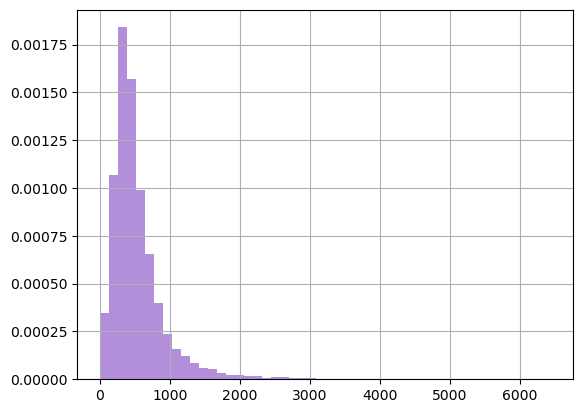

In [ ]:
#Comparación de dataset   
data['total_bedrooms'].hist(bins=50, density=True, color='red', alpha=0.2)
data_noNAN['total_bedrooms'].hist(bins=50, density=True, color='black', alpha=0.3)
plt.show()

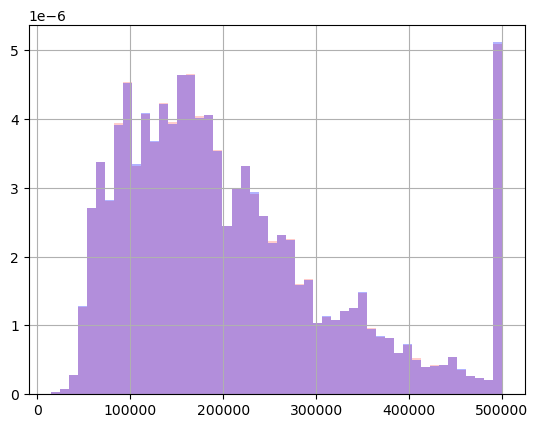

In [12]:
#Comparación de dataset    
data['median_house_value'].hist(bins=50, density=True, color='red', alpha=0.2)
data_noNAN['median_house_value'].hist(bins=50, density=True, color='blue', alpha=0.3)
plt.show()

#### 4. Si la variable es categórica, realice una imputación que considere necesaria.
#### No hay NA en la unica categorica

#### 5. Realice la codificación de variables categóricas, determine cual es le mejor enfoque para cada caso, recuerde que puede realizar los siguientes enfoques:
#### a. One Hote Encodign.
#### b. Codificación por Frecuencia.
#### c. Codificación por Densidad.

In [13]:
def getCategoryVars(data):
     cat_colnames = []
     colnames = data.columns
     for col in colnames:
          if(data[col].dtype == 'object'):
               cat_colnames.append(col)
     return cat_colnames

In [14]:
cat_cols = getCategoryVars(data_noNAN)
cat_cols

['ocean_proximity']

In [15]:
cat_cols.append('median_house_value')

In [16]:
dataset_categories = data_noNAN[cat_cols]
dataset_categories.head()

,ocean_proximity,median_house_value
0,<1H OCEAN,227500.0
1,INLAND,65800.0
2,<1H OCEAN,500001.0
3,NEAR BAY,225000.0
4,<1H OCEAN,272900.0


In [17]:
# Frequency Encoding
dataset_categories['ocean_proximity'].value_counts().sort_values(ascending=False)

<1H OCEAN     6320
INLAND        4542
NEAR OCEAN    1844
NEAR BAY      1602
ISLAND           2
Name: ocean_proximity, dtype: int64

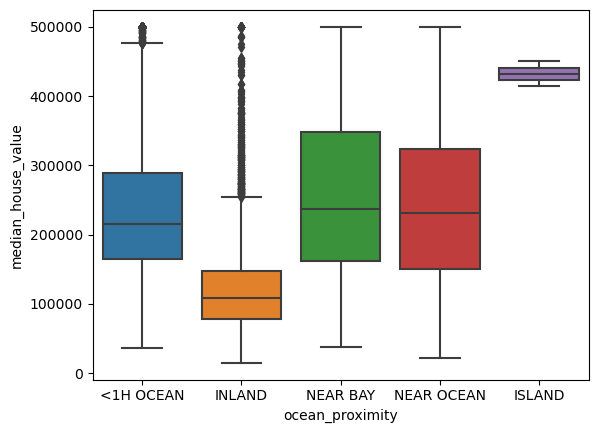

In [18]:
sns.boxplot(x=dataset_categories['ocean_proximity'], y=dataset_categories['median_house_value'])
plt.show()

In [19]:
ocean_proximity_freq_mapper = (dataset_categories['ocean_proximity'].value_counts().sort_values(ascending=False)).to_dict()
ocean_proximity_freq_mapper

{'<1H OCEAN': 6320,
 'INLAND': 4542,
 'NEAR OCEAN': 1844,
 'NEAR BAY': 1602,
 'ISLAND': 2}

#### 6. Para todas las variables resultantes realice Feature Scaling según lo considere más pertinente.

In [21]:
data_noNAN.drop('ocean_proximity', axis=1, inplace=True) 
data_noNAN.drop('id', axis=1, inplace=True)  
data_noNAN = pd.concat([data_noNAN, dataset_categories['ocean_proximity_code']], axis=1)  
data_noNAN


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_code
0,-121.65,36.77,15,2191,358.0,1150,330,4.7969,227500.0,6320
1,-116.27,34.13,37,452,109.0,184,59,3.7292,65800.0,4542
2,-122.07,37.34,35,1172,184.0,512,175,7.3561,500001.0,6320
3,-122.39,37.74,52,126,24.0,37,27,10.2264,225000.0,1602
4,-118.38,34.09,28,4001,1352.0,1799,1220,2.5784,272900.0,6320
...,...,...,...,...,...,...,...,...,...,...
14442,-122.25,37.77,43,4329,1110.0,2086,1053,2.9750,243400.0,1602
14443,-122.48,37.71,43,3850,1018.0,1497,829,3.5296,400000.0,1844
14444,-118.17,34.69,12,4881,803.0,2188,724,4.1667,171900.0,4542
14445,-121.44,38.47,5,5666,1178.0,3139,1131,3.3608,108900.0,4542


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
def getColumnTypes(dataset):
     ''' Descripcion: Esta función extrae el tipo de dominio de las columnas de un dataset.
         Entradas: Pandas Dataframe  
         Salida: Tupla con arreglo que contine nombres de las columnas. '''
     
     continuas = []
     discretas = []
     categoricas = []
     for col in dataset.columns:
          if((dataset[col].dtype == 'int64') or (dataset[col].dtype == 'float64')):
               if(len(dataset[col].unique()) > 30): #criterio para discretas o continuas
                    continuas.append(col)
               else:
                    discretas.append(col)
          else:
               categoricas.append(col)

     return continuas, discretas, categoricas

In [24]:
continuas, discretas, categoricas = getColumnTypes(data_noNAN)
print(continuas)
print(discretas)
print(categoricas)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
['ocean_proximity_code']
[]


In [29]:
data_temp = data_noNAN
scaler = StandardScaler()
scaler.fit(data_temp) 

data_scaled = scaler.transform(data_temp)
data_scaled = pd.DataFrame(data_scaled, columns=data_temp.columns)

In [33]:
round(data_scaled.describe(), 9)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_code
count,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000
mean,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
std,1.000035,1.000035,1.000035,1.000035,1.000035,1.000035,1.000035,1.000035,1.000035,1.000035
min,-2.356618,-1.452501,-2.212354,-1.186892,-1.265995,-1.262399,-1.292801,-1.776900,-1.663530,-2.561224
25%,-1.108630,-0.801589,-0.861930,-0.536453,-0.572595,-0.568053,-0.569738,-0.685145,-0.758422,-0.059415
50%,0.538715,-0.647056,0.011874,-0.231968,-0.247121,-0.232452,-0.238010,-0.173217,-0.235650,-0.059415
75%,0.778329,0.973199,0.647368,0.225773,0.257599,0.263382,0.269948,0.453818,0.500394,0.920369
max,2.630343,2.954031,1.838919,16.535874,13.932205,24.161349,14.466864,5.882052,2.541210,0.920369


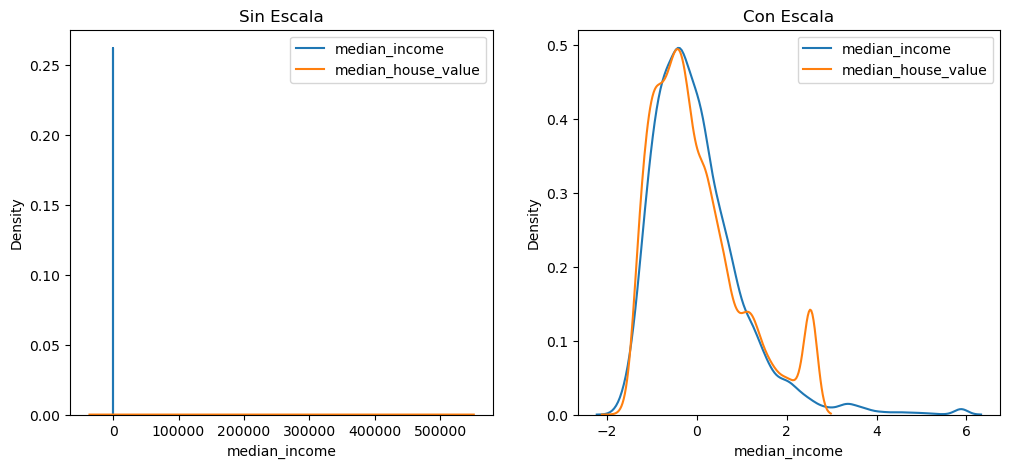

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Sin Escala")
sns.kdeplot(data_temp['median_income'], ax=ax1, label="median_income")
sns.kdeplot(data_temp['median_house_value'], ax=ax1, label="median_house_value")

ax2.set_title("Con Escala")
sns.kdeplot(data_scaled['median_income'], ax=ax2, label="median_income")
sns.kdeplot(data_scaled['median_house_value'], ax=ax2, label="median_house_value")

ax1.legend()
ax2.legend()

plt.show()